In [3]:
import requests
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

### Importation du json

In [4]:
data = requests.get("https://data.airbreizh.asso.fr/geoserver/ind_bretagne_agglo/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=ind_bretagne_agglo:ind_bretagne_agglo&outputFormat=application%2Fjson").json()

###  Passage du .json en dataframe

In [5]:
df = pd.json_normalize(data, record_path = 'features')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  2547 non-null   object
 1   id                    2547 non-null   object
 2   geometry_name         2547 non-null   object
 3   geometry.type         2547 non-null   object
 4   geometry.coordinates  2547 non-null   object
 5   properties.date_ech   2547 non-null   object
 6   properties.valeur     2547 non-null   int64 
 7   properties.qualif     2547 non-null   object
 8   properties.source     2547 non-null   object
 9   properties.type_zone  2547 non-null   object
 10  properties.code_zone  2547 non-null   object
 11  properties.lib_zone   2547 non-null   object
 12  properties.val_no2    2547 non-null   int64 
 13  properties.val_so2    2547 non-null   int64 
 14  properties.val_o3     2547 non-null   int64 
 15  properties.val_pm10   2547 non-null   

In [7]:
df['properties.lib_zone'].unique()

array(['CA Saint-Brieuc Armor', 'CA Golfe du Morbihan - Vannes',
       'CA Quimper Bretagne Occidentale', 'Rennes Métropole',
       'CA du Pays de Saint-Malo (Saint-Malo Agglomération)',
       'Brest Métropole', 'CA Lorient'], dtype=object)

### création d'une database avec les valeurs "utiles" 

In [8]:
data = df[['geometry.coordinates', 'properties.date_ech', 'properties.valeur','properties.qualif', 'properties.lib_zone']]

In [9]:
data

,geometry.coordinates,properties.date_ech,properties.valeur,properties.qualif,properties.lib_zone
0,"[269153.26829935, 6832824.93414115]",2021-01-01T09:00:00Z,3,Bon,CA Saint-Brieuc Armor
1,"[269961.11069397, 6746307.89925287]",2021-01-01T09:00:00Z,3,Bon,CA Golfe du Morbihan - Vannes
2,"[172753.63056731, 6795400.54381628]",2021-01-01T09:00:00Z,3,Bon,CA Quimper Bretagne Occidentale
3,"[349555.00704537, 6789093.38652832]",2021-01-01T09:00:00Z,3,Bon,Rennes Métropole
4,"[338719.75810268, 6844013.78819969]",2021-01-01T09:00:00Z,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...
...,...,...,...,...,...
2542,"[269153.26829935, 6832824.93414115]",2020-01-01T09:00:00Z,3,Bon,CA Saint-Brieuc Armor
2543,"[172753.63056731, 6795400.54381628]",2020-01-01T09:00:00Z,3,Bon,CA Quimper Bretagne Occidentale
2544,"[229772.04043578, 6768639.92668385]",2020-01-01T09:00:00Z,3,Bon,CA Lorient
2545,"[338719.75810268, 6844013.78819969]",2020-01-01T09:00:00Z,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...


### Split des coordonnées en vue d'une cartographie

In [10]:
data['longitude'] = data['geometry.coordinates'].apply(lambda x : x[0])    
data['latitude'] = data['geometry.coordinates'].apply(lambda x : x[1])   

<ipython-input-10-39e3c755cde0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['longitude'] = data['geometry.coordinates'].apply(lambda x : x[0])
<ipython-input-10-39e3c755cde0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['latitude'] = data['geometry.coordinates'].apply(lambda x : x[1])


In [11]:
data_coord = data[['properties.lib_zone', 'properties.valeur', 'longitude', 'latitude']]
data_coord = data_coord.groupby(data_coord['properties.lib_zone']).mean()

In [12]:
data_coord

,properties.valeur,longitude,latitude
properties.lib_zone,,,
Brest Métropole,3.819945,147878.224207,6.837176e+06
CA Golfe du Morbihan - Vannes,3.723288,269961.110694,6.746308e+06
CA Lorient,3.731507,229772.040436,6.768640e+06
CA Quimper Bretagne Occidentale,3.713115,172753.630567,6.795401e+06
CA Saint-Brieuc Armor,3.660274,269153.268299,6.832825e+06
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,338719.758103,6.844014e+06
Rennes Métropole,3.646409,349555.007045,6.789093e+06


## préparation des données en vue de cartographie

In [13]:
from pyproj import Proj, transform

In [14]:
inProj = Proj(init='epsg:2154')
outProj = Proj(init='epsg:4326')

C:\Users\utilisateur\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\utilisateur\anaconda3\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\utilisateur\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making

In [15]:
def gps(long, lat):
    long,lat = transform(inProj,outProj,long,lat)
    return long, lat

In [16]:
data_coord['longitude_gps'] = data_coord.apply(lambda x : gps(x.longitude, x.latitude)[0], axis=1)
data_coord['latitude_gps'] = data_coord.apply(lambda x : gps(x.longitude, x.latitude)[1], axis=1)

<ipython-input-15-a96484fa8f3e>:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  long,lat = transform(inProj,outProj,long,lat)


In [17]:
data_coord

,properties.valeur,longitude,latitude,longitude_gps,latitude_gps
properties.lib_zone,,,,,
Brest Métropole,3.819945,147878.224207,6.837176e+06,-4.470520,48.399641
CA Golfe du Morbihan - Vannes,3.723288,269961.110694,6.746308e+06,-2.736238,47.676516
CA Lorient,3.731507,229772.040436,6.768640e+06,-3.293846,47.849403
CA Quimper Bretagne Occidentale,3.713115,172753.630567,6.795401e+06,-4.085219,48.045952
CA Saint-Brieuc Armor,3.660274,269153.268299,6.832825e+06,-2.832059,48.452434
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,338719.758103,6.844014e+06,-1.902423,48.595360
Rennes Métropole,3.646409,349555.007045,6.789093e+06,-1.711339,48.108092


### Cartographie

Text(0, 0.5, 'latitude')

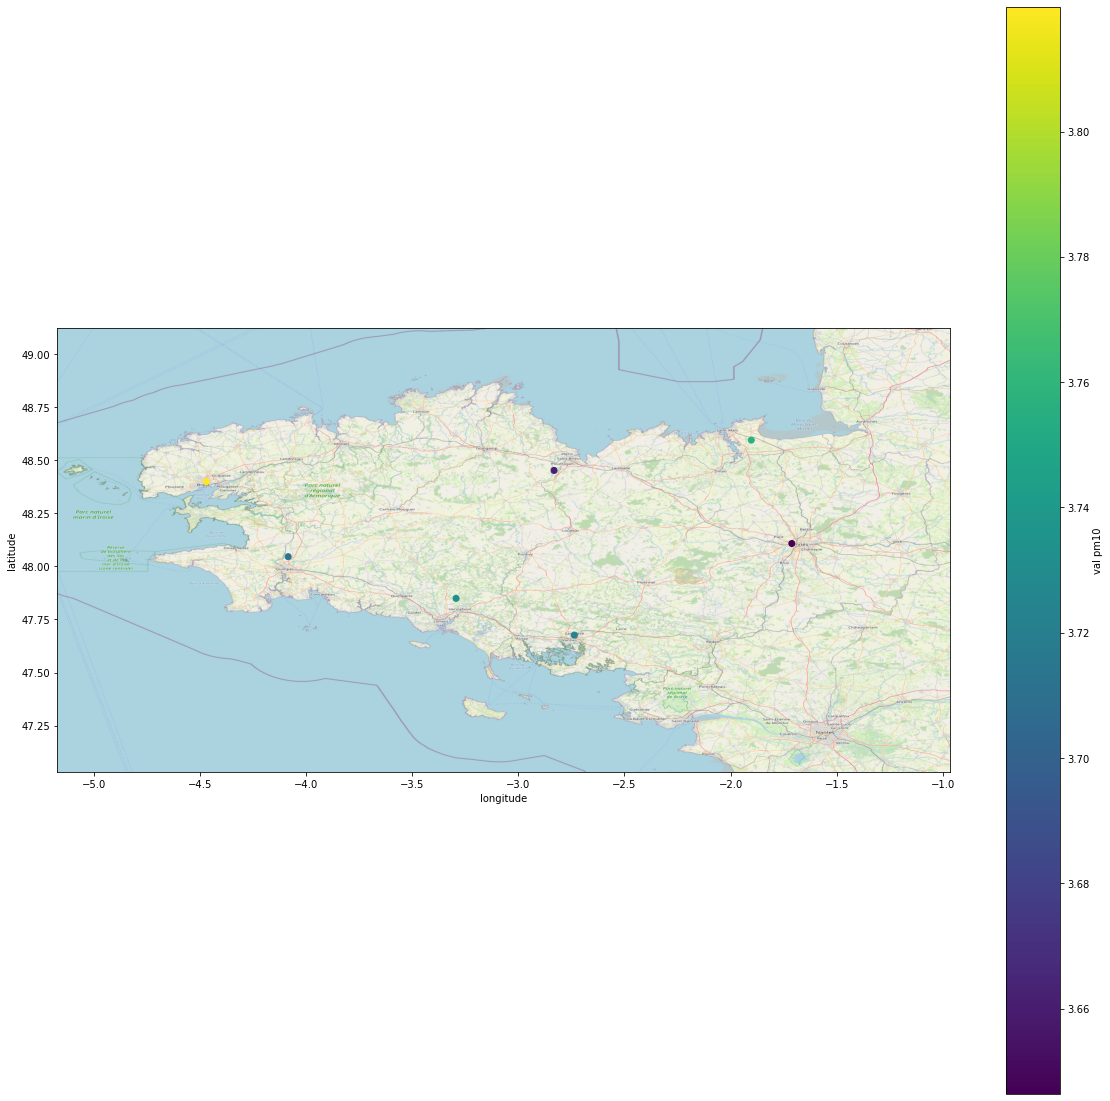

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))

bretagne = plt.imread("map.png")
plt.imshow(bretagne, zorder=0, extent=[-5.175, -0.967, 47.029, 49.124])
plt.scatter(data_coord["longitude_gps"],data_coord["latitude_gps"], c= data_coord["properties.valeur"])

plt.colorbar(label="val pm10")
plt.xlabel("longitude")
plt.ylabel("latitude")

### transformation des dates pour retirer les heures et avoir le format YYYY-MM-DD

In [8]:
data['properties.date_ech'] = data['properties.date_ech'].apply(lambda x: x[:10])


<ipython-input-8-faadec0b27ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['properties.date_ech'] = data['properties.date_ech'].apply(lambda x: x[:10])


### création d'un json avec la database nettoyée